# 10. MACHINE LEARNING EXPLAINABILITY

# 10.3. PARTIAL PLOTS

# 10.3.1. COURS

# Partial Dependence Plots

In [1]:
# Chemin des sources
import os
os.chdir('C:/Users/PC Maison/4-KAGGLE/KAGGLE_DEV/KAGGLE_COURS_10-MACHINE_LEARNING_EXPLAINABILITY')

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv('fifa-2018-match-statistics/input/fifa-2018.csv')

In [4]:
# TARGET
# Convert from string "Yes"/"No" to binary
y = (data['Man of the Match'] == "Yes")  

In [5]:
# FEATURES
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]

In [6]:
# DECOUPE DU JEU DE DONNEES EN TRAIN SET ET TEST SET
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [7]:
# création du model
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, 
                                    min_samples_split=5)
tree_model.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=0)

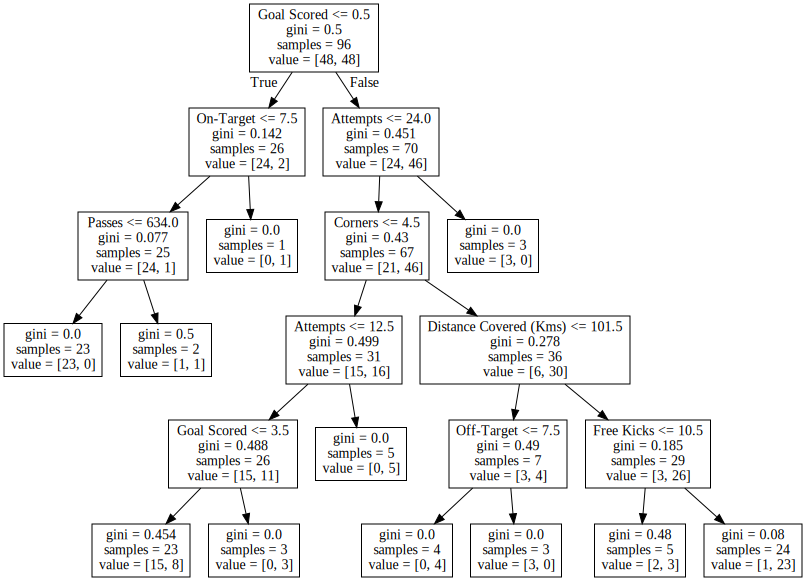

In [8]:
# Visualisation de l'arbre de décision
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

In [9]:
# Les feuilles avec les enfants montrent leur critère de division en haut
# La paire de valeurs en bas montre le nombre de valeurs fausses et de valeurs
# vraies pour la cible respectivement, des points de données dans ce nœud de 
# l'arbre.

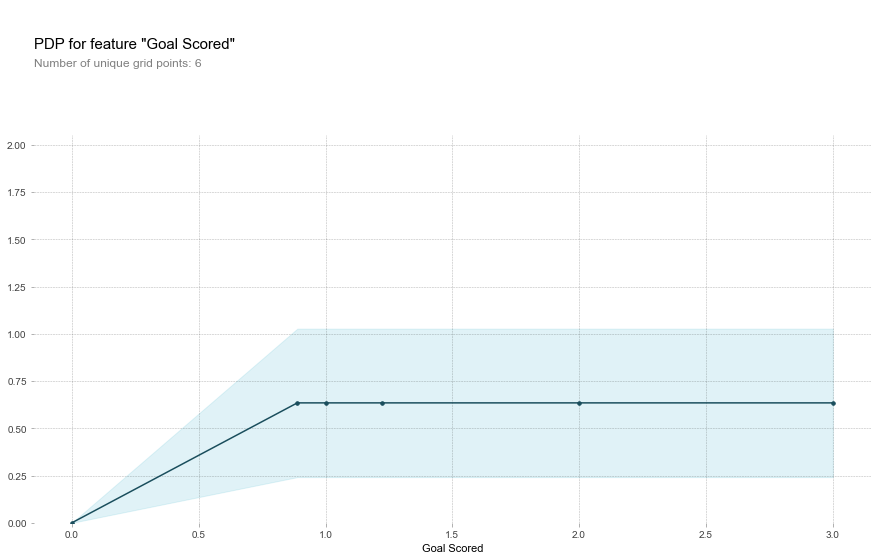

In [10]:
# Partial Dependence Plot using the PDPBox library
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, 
                            model_features=feature_names, feature='Goal Scored')

# plot it
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

In [11]:
# L'axe des y est interprété comme un changement dans la prédiction par rapport
# à ce qui serait prédit à la ligne de base ou à la valeur la plus à gauche.
# Une zone ombrée en bleu indique le niveau de confiance
# Ce graphique montre qu'en marquant un but, vous augmentez considérablement 
# vos chances de gagner le titre d'"Homme du match". 
# Mais des buts supplémentaires au-delà de cette limite semblent avoir peu
# d'impact sur les pronostics.

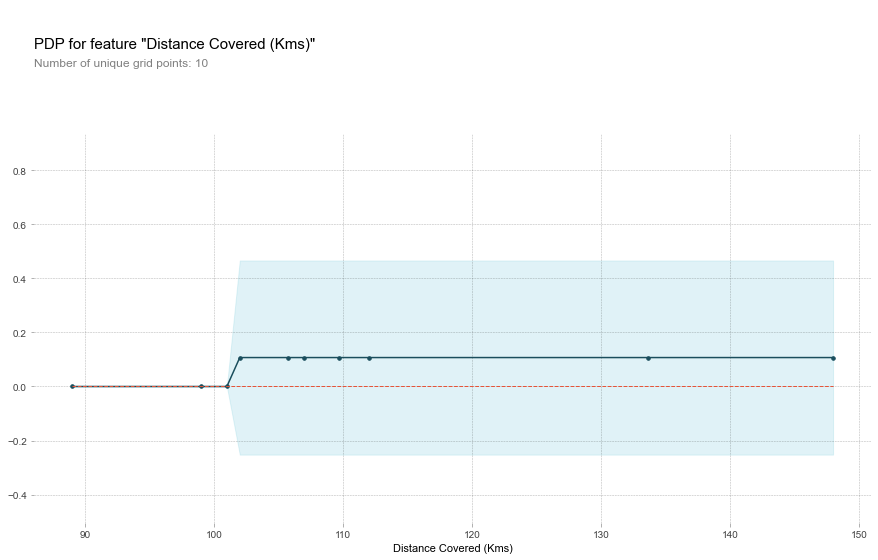

In [12]:
feature_to_plot = 'Distance Covered (Kms)'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, 
                           model_features=feature_names, 
                           feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

In [13]:
# Ce graphique semble trop simple pour représenter la réalité. 
# Mais c'est parce que le modèle est si simple. 
# L'arbre de décision ci-dessus devrait vous permettre de voir qu'il représente
# exactement la structure du modèle.
# Vous pouvez facilement comparer la structure ou les implications de 
# différents modèles. Voici la même parcelle avec un modèle de Random Forest.

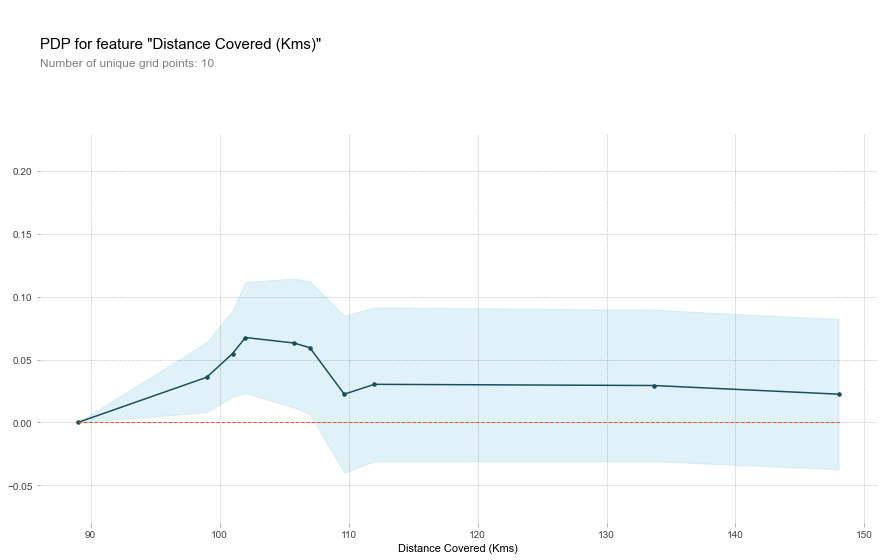

In [14]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

In [15]:
# Ce modèle pense que vous avez plus de chances de gagner le titre d'Homme du 
# match si vos joueurs courent un total de 100 km au cours du jeu. 
# Bien que courir beaucoup plus entraîne des prédictions plus faibles.
# En général, la forme lisse de cette courbe semble plus plausible que la 
# fonction de pas du modèle de l'arbre de décision. Bien que cet ensemble de 
# données soit suffisamment petit pour que nous soyons prudents dans 
# l'interprétation de n'importe quel modèle.

# 2D Partial Dependence Plots

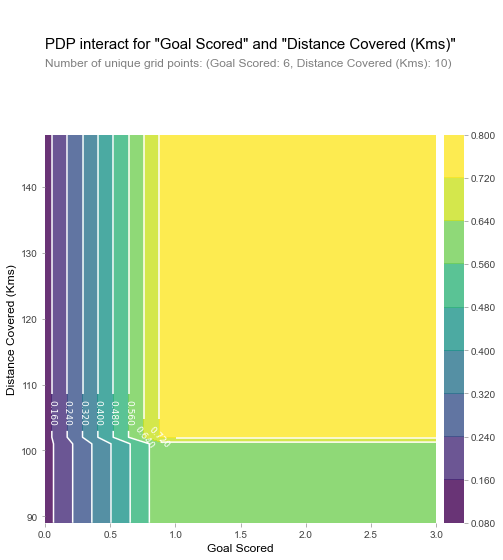

In [16]:
# Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
features_to_plot = ['Goal Scored', 'Distance Covered (Kms)']
inter1  =  pdp.pdp_interact(model=tree_model, dataset=val_X, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

In [ ]:
# Ce graphique montre les prévisions pour toute combinaison de buts marqués et 
# de distance parcourue.
# Par exemple, nous voyons les prévisions les plus élevées lorsqu'une équipe 
# marque au moins 1 but et qu'elle parcourt une distance totale proche de 100
# km. Si elle marque 0 but, la distance parcourue n'a pas d'importance. 
# Pouvez-vous le constater en parcourant l'arbre de décision avec 0 but ?
# Mais la distance peut avoir un impact sur les prédictions si l'équipe marque
# des buts. Assurez-vous que vous pouvez le voir à partir du diagramme de 
# dépendance partielle en 2D. Pouvez-vous également voir ce schéma dans 
# l'arbre de décision ?

# 10.3.2. EXERCICES

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
data = pd.read_csv('new-york-city-taxi-fare-prediction/input/train.csv', nrows=50000)

In [34]:
# Remove data with extreme outlier coordinates or negative fares
data = data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0')

In [35]:
# TRAGET 
y = data.fare_amount

In [36]:
# FEATURES
base_features = ['pickup_longitude',
                 'pickup_latitude',
                 'dropoff_longitude',
                 'dropoff_latitude']

X = data[base_features]

In [37]:
# Séparation du jeu de données en train set et val set
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [38]:
# Création du modèle RandomForestRegressor
first_model = RandomForestRegressor(n_estimators=30, random_state=1)
first_model.fit(train_X, train_y)

RandomForestRegressor(n_estimators=30, random_state=1)

In [39]:
print("Data sample:")
data.head()

Data sample:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1


In [40]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000
mean,8.483093,-73.976860,40.756917,-73.975342,40.757473,1.656141
std,4.628164,0.014635,0.018170,0.015917,0.018661,1.284899
min,0.010000,-73.999999,40.700013,-73.999999,40.700020,0.000000
25%,5.500000,-73.988039,40.744947,-73.987125,40.745922,1.000000
50%,7.500000,-73.979691,40.758027,-73.978547,40.758559,1.000000
75%,10.100000,-73.967823,40.769580,-73.966435,40.770427,2.000000
max,165.000000,-73.900062,40.799952,-73.900062,40.799999,6.000000


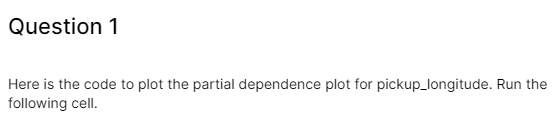

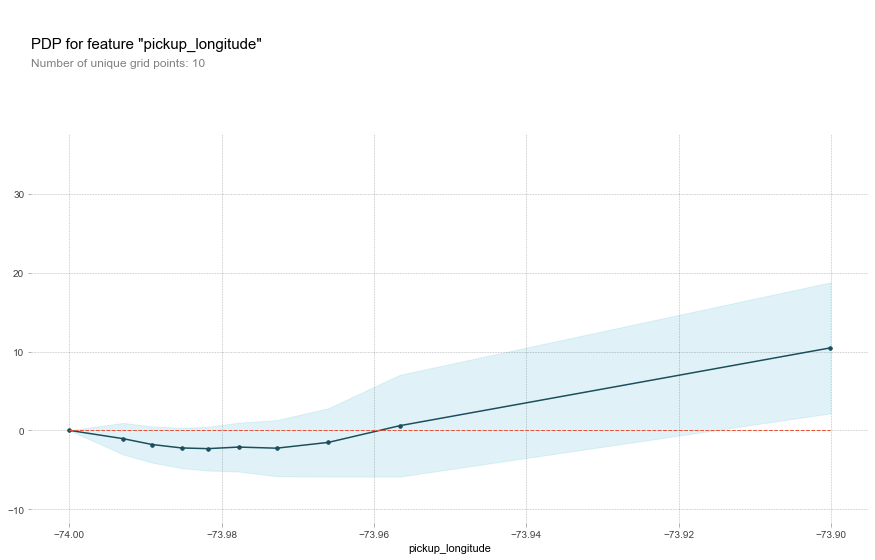

In [41]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

feat_name = 'pickup_longitude'
pdp_dist = pdp.pdp_isolate(model=first_model, dataset=val_X, 
                           model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

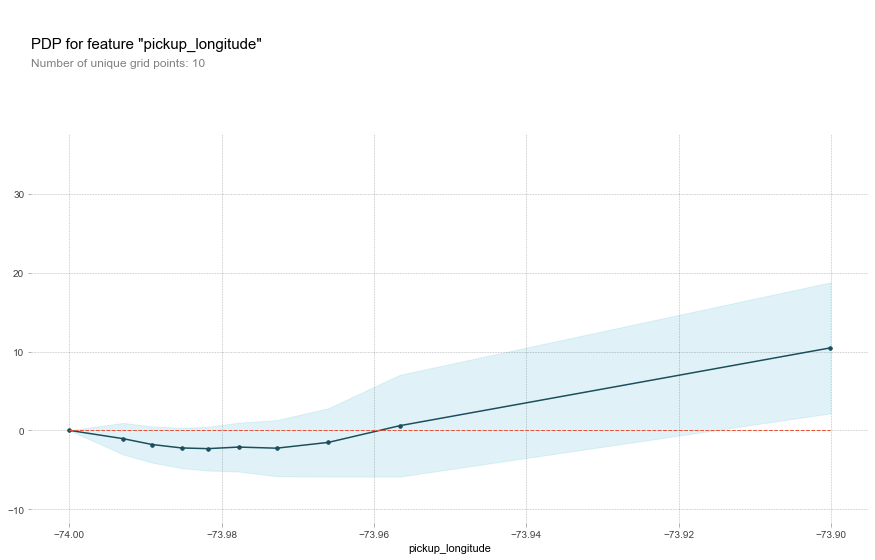

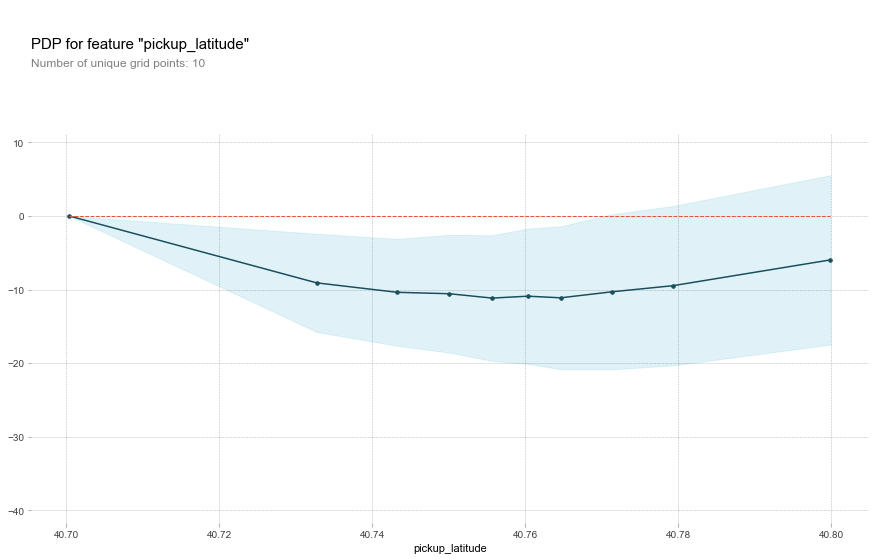

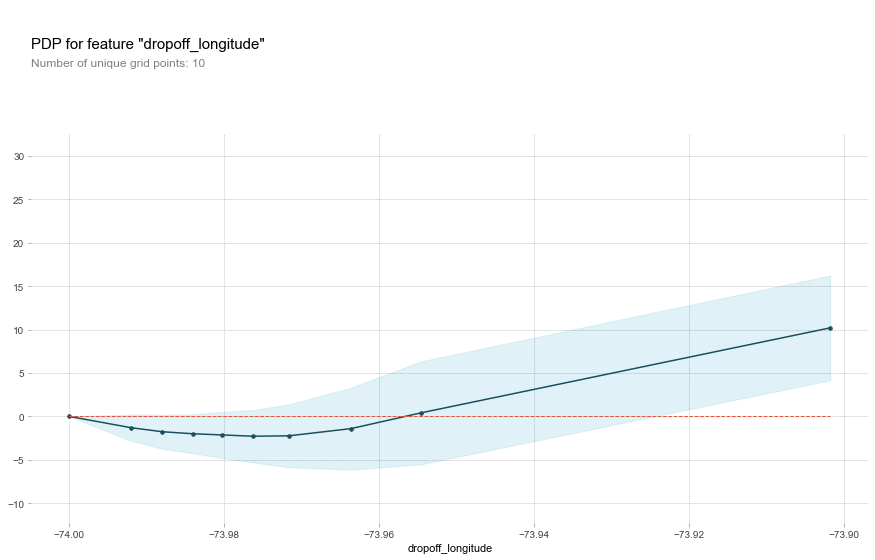

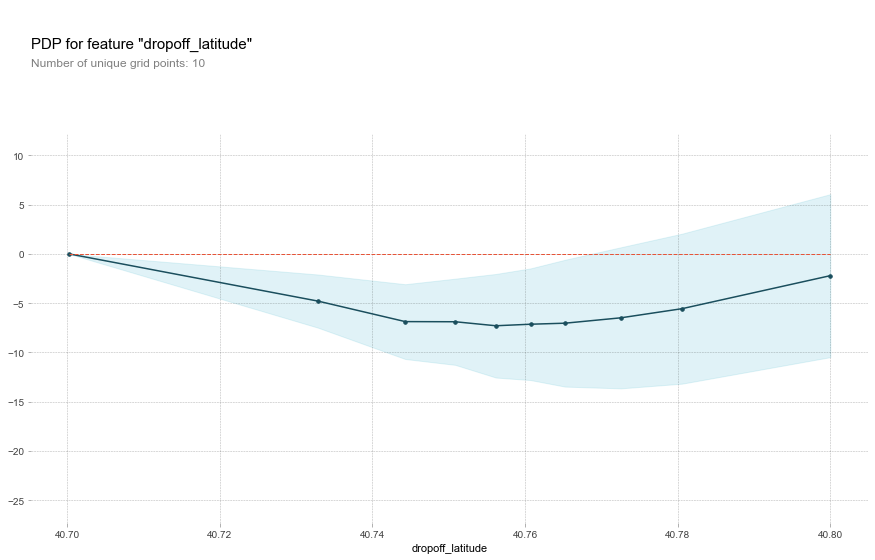

In [42]:
for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model=first_model, dataset=val_X, model_features=base_features, feature=feat_name)
    
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

In [ ]:
# Nous avons le sentiment, d'après les résultats de l'importance de la 
# permutation, que la distance est le facteur déterminant le plus important du
# prix du taxi.
# Ce modèle n'incluait pas les mesures de distance (comme le changement absolu 
# de latitude ou de longitude) en tant que caractéristiques, donc les 
# caractéristiques de coordonnées (comme la pickup_longitude) capturent 
# l'effet de la distance. Le fait d'être ramassé près du centre des valeurs de
# longitude fait baisser les tarifs prévus en moyenne, car cela signifie des 
# trajets plus courts (en moyenne).
# Pour la même raison, nous voyons la forme générale en U dans tous nos 
# graphiques de dépendance partielle.

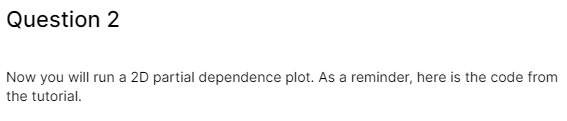

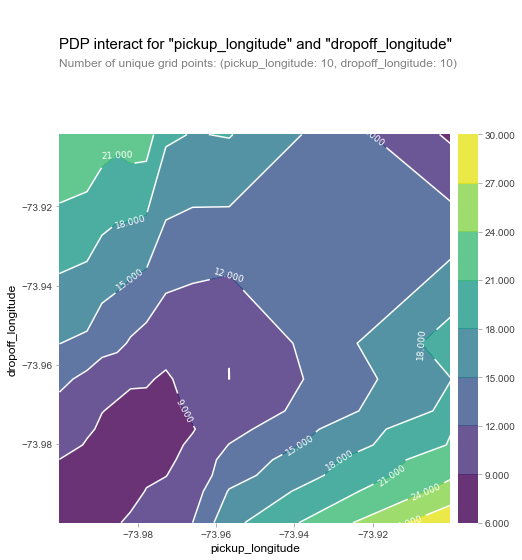

In [43]:
# Add your code here
inter1  =  pdp.pdp_interact(model=first_model, dataset=val_X, model_features=base_features, features=['pickup_longitude', 'dropoff_longitude'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['pickup_longitude', 'dropoff_longitude'], plot_type='contour')
plt.show()

In [ ]:
# Il faut s'attendre à ce que l'intrigue ait des contours en diagonale. 
# Nous le constatons dans une certaine mesure, bien qu'il y ait des mises en 
# garde intéressantes.
# Nous nous attendons à des contours diagonaux car il s'agit de paires de 
# valeurs où les longitudes de ramassage et de chute sont proches, ce qui 
# indique des trajets plus courts (en tenant compte d'autres facteurs).
# Plus on s'éloigne de la diagonale centrale, plus les prix devraient 
# augmenter, car les distances entre les longitudes de ramassage et de descente
# augmentent également.
# Ce qui est surprenant, c'est que les prix augmentent à mesure que l'on 
# s'éloigne de la partie supérieure droite de ce graphique, même en restant
# près de cette ligne à 45 degrés.
# Cela pourrait mériter une étude plus approfondie, bien que l'effet d'un 
# déplacement vers la partie supérieure droite de ce graphique soit faible par 
# rapport à un éloignement de cette ligne à 45 degrés.

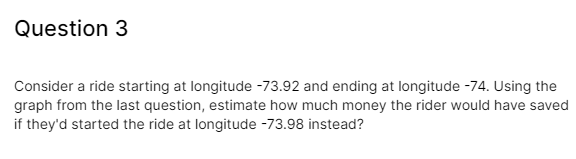

In [45]:
savings_from_shorter_trip = 25.000-10.000
savings_from_shorter_trip

15.0

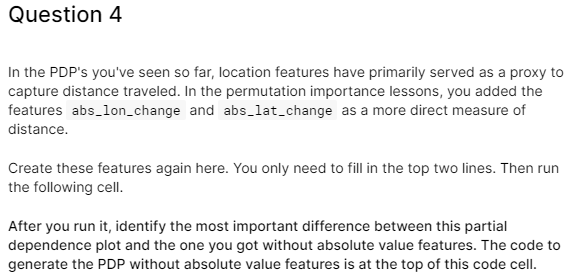

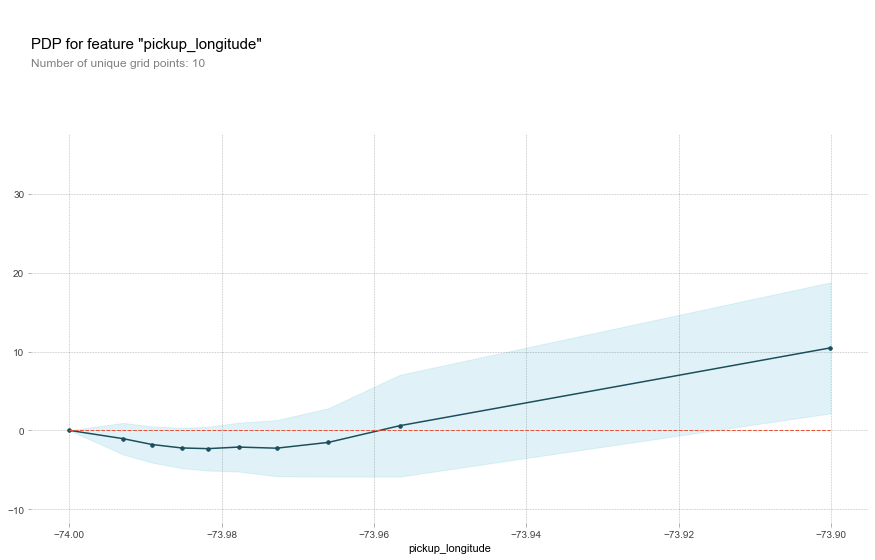

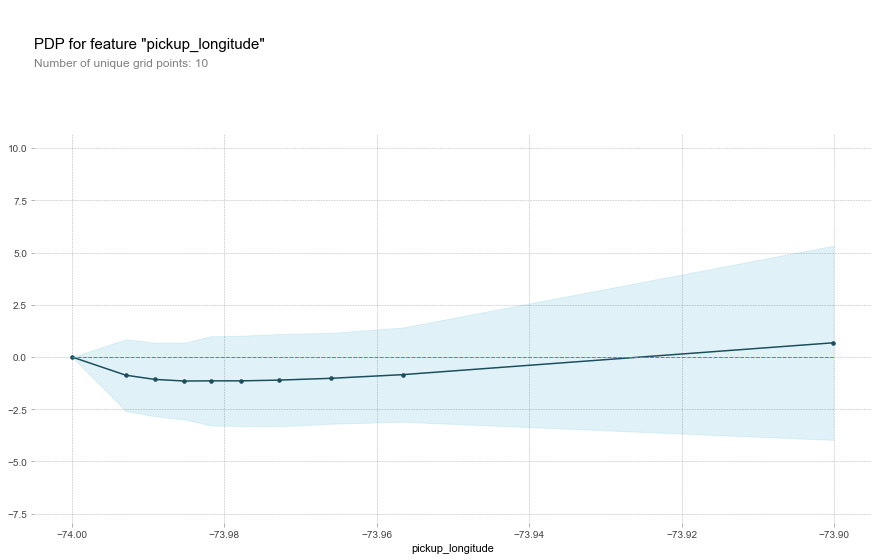

In [47]:
# This is the PDP for pickup_longitude without the absolute difference features. Included here to help compare it to the new PDP you create
feat_name = 'pickup_longitude'
pdp_dist_original = pdp.pdp_isolate(model=first_model, dataset=val_X, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist_original, feat_name)
plt.show()



# create new features
data['abs_lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['abs_lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)

features_2  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']

X = data[features_2]
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(X, y, random_state=1)
second_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(new_train_X, new_train_y)

feat_name = 'pickup_longitude'
pdp_dist = pdp.pdp_isolate(model=second_model, dataset=new_val_X, model_features=features_2, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

In [ ]:
# La plus grande différence est que le diagramme de dépendance partielle est
# devenu beaucoup plus petit. 
# La valeur verticale la plus basse se situe à environ 15 𝑏𝑒𝑙𝑜𝑤 𝑡ℎ𝑒 ℎ𝑖𝑔ℎ𝑒𝑠𝑡 
# 𝑣𝑒𝑟𝑡𝑖𝑐𝑎𝑙 𝑣𝑎𝑙𝑢𝑒 𝑖𝑛 𝑡ℎ𝑒 𝑡𝑜𝑝 𝑐ℎ𝑎𝑟𝑡, 𝑤ℎ𝑒𝑟𝑒 𝑎𝑠 𝑡ℎ𝑖𝑠 𝑑𝑖𝑓𝑓𝑒𝑟𝑒𝑛𝑐𝑒 𝑖𝑠 𝑜𝑛𝑙𝑦 𝑎𝑏𝑜𝑢𝑡 3 dans le 
# graphique que vous venez de créer. 
# En d'autres termes, une fois que vous contrôlez la distance absolue parcourue,
# la pickup_longitude n'a qu'un très faible impact sur les prédictions.

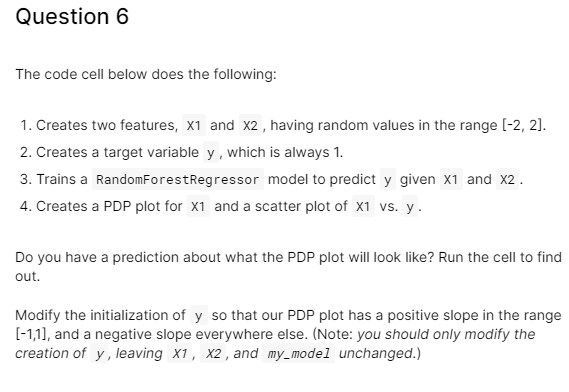

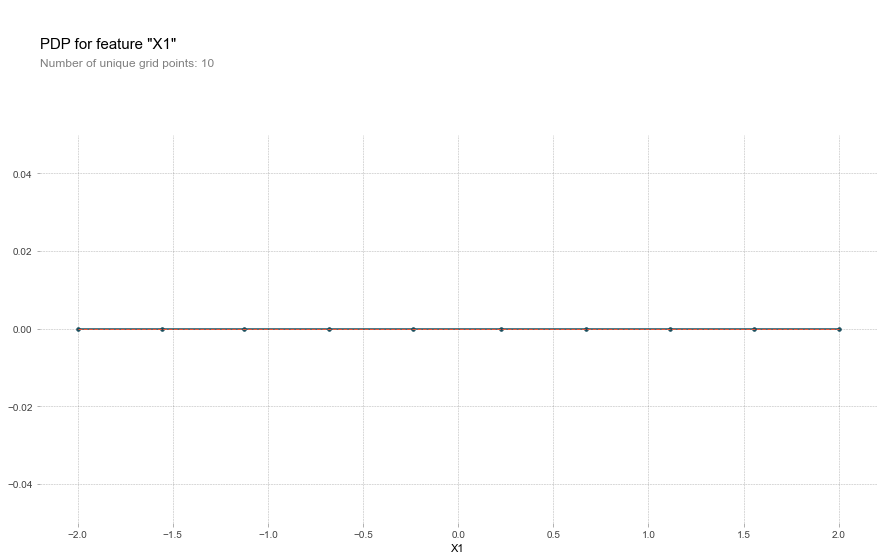

In [48]:
import numpy as np
from numpy.random import rand

n_samples = 20000

# Create array holding predictive feature
X1 = 4 * rand(n_samples) - 2
X2 = 4 * rand(n_samples) - 2
# Create y. you should have X1 and X2 in the expression for y
y = np.ones(n_samples)

# create dataframe because pdp_isolate expects a dataFrame as an argument
my_df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
predictors_df = my_df.drop(['y'], axis=1)

my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)

pdp_dist = pdp.pdp_isolate(model=my_model, dataset=my_df, model_features=['X1', 'X2'], feature='X1')

# visualize your results
pdp.pdp_plot(pdp_dist, 'X1')
plt.show()

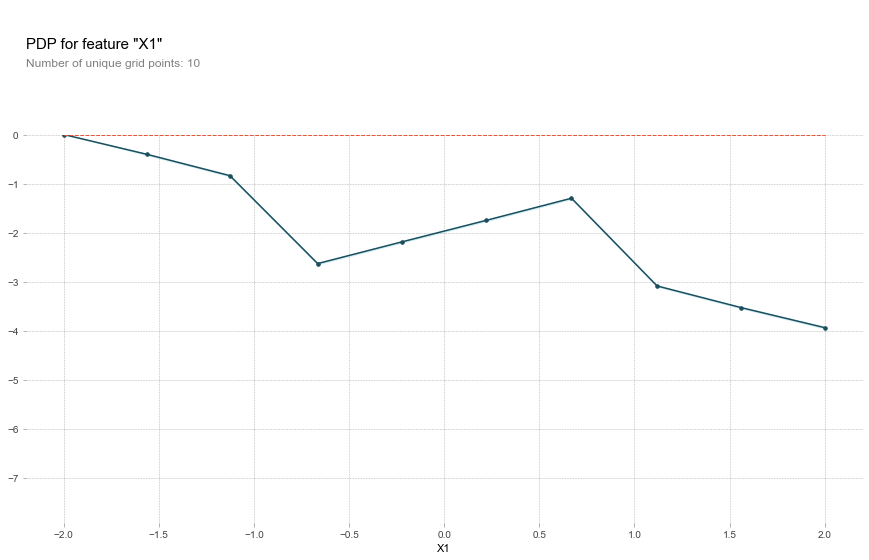

In [49]:
import numpy as np
from numpy.random import rand

n_samples = 20000

# Create array holding predictive feature
X1 = 4 * rand(n_samples) - 2
X2 = 4 * rand(n_samples) - 2
# Create y. you should have X1 and X2 in the expression for y
y = -2 * X1 * (X1<-1) + X1 - 2 * X1 * (X1>1) - X2

# create dataframe because pdp_isolate expects a dataFrame as an argument
my_df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
predictors_df = my_df.drop(['y'], axis=1)

my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)

pdp_dist = pdp.pdp_isolate(model=my_model, dataset=my_df, model_features=['X1', 'X2'], feature='X1')

# visualize your results
pdp.pdp_plot(pdp_dist, 'X1')
plt.show()

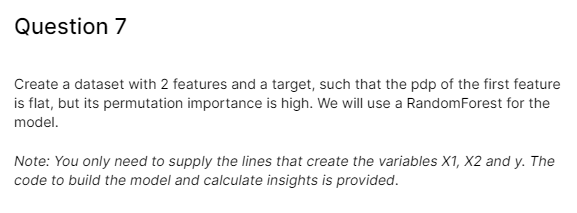

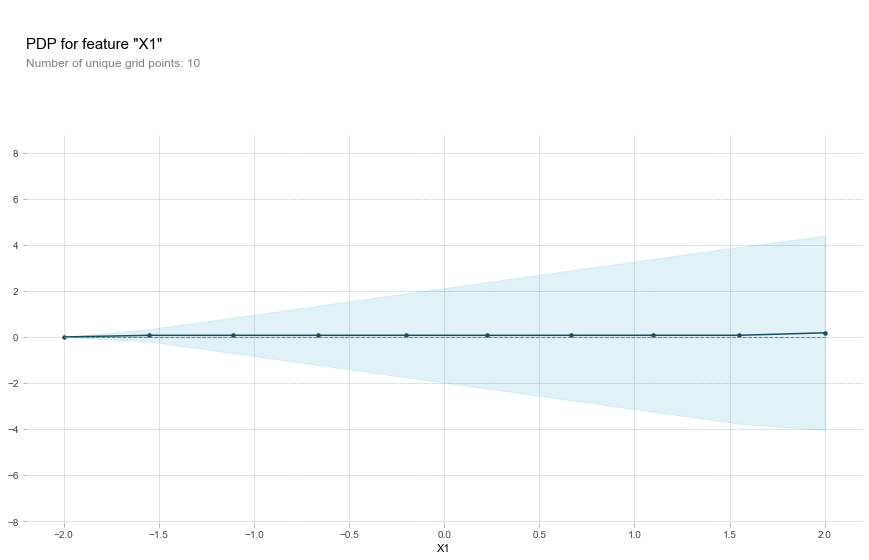

Weight,Feature
2.0117 ± 0.0165,X1
2.0000 ± 0.0205,X2


In [50]:
import eli5
from eli5.sklearn import PermutationImportance

n_samples = 20000

# Create array holding predictive feature
X1 = 4 * rand(n_samples) - 2
X2 = 4 * rand(n_samples) - 2

# Create y. you should have X1 and X2 in the expression for y
y = X1 * X2

# create dataframe because pdp_isolate expects a dataFrame as an argument
my_df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
predictors_df = my_df.drop(['y'], axis=1)

my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)


pdp_dist = pdp.pdp_isolate(model=my_model, dataset=my_df, model_features=['X1', 'X2'], feature='X1')
pdp.pdp_plot(pdp_dist, 'X1')
plt.show()

perm = PermutationImportance(my_model).fit(predictors_df, my_df.y)

# show the weights for the permutation importance you just calculated
eli5.show_weights(perm, feature_names = ['X1', 'X2'])